# Assignment #2 - Classification
Due: Mar 5 (Tuesday) 11:00 pm

Gaurav Mahadik

# I. Introduction

In this assignment we have tried to understand classification using a practical approach by implementing four classification algorithms and learn about classififcation in a step by step process. The data has been used from Kaggle is a Bank Marketing Dataset which accessed, processed and visualized and made ready for analysis by the classififcation algorithms.

Classification

Classification predictive modeling is the task of approximating a mapping function (f) from input variables (X) to discrete output variables (y). The output variables are often called labels or categories. The mapping function predicts the class or category for a given observation. It is common for classification models to predict a continuous value as the probability of a given example belonging to each output class.The probabilities can be interpreted as the likelihood or confidence of a given example belonging to each class. A predicted probability can be converted into a class value by selecting the class label that has the highest probability.

In this assignment, basically 4 methods are implemented-

1) Pocket algorithm

2) QDA (Quadratic Discriminant Analysis)

3) LDA (Linear Discriminant Analysis)

4) Logistic Regression

Based on the analysis of the evaluation metrices, we can find the best classifier in these 4 algorithms and this is the main objective of this assignment.

# II. Data

# Introduction of Data

The data set which has been used is a Bank Marketing Dataset which is a record of all the marketing dont by the bank to get customers to deposit money in their bank. This data set is having 11162 rows and 17 columns.This dataset has a binary variable deposit (Yes = yes, No = no) as target variable.The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# Data Source

https://www.kaggle.com/janiobachmann/bank-marketing-dataset

# Reading Data 

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("bank.csv")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# Pre-Processing the Data

In [5]:
df1 = df

In [6]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df1 = df1.drop(columns=['default', 'loan','contact','poutcome'])

In [8]:
df1.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,previous,deposit
0,59,admin.,married,secondary,2343,yes,5,may,1042,1,-1,0,yes
1,56,admin.,married,secondary,45,no,5,may,1467,1,-1,0,yes
2,41,technician,married,secondary,1270,yes,5,may,1389,1,-1,0,yes
3,55,services,married,secondary,2476,yes,5,may,579,1,-1,0,yes
4,54,admin.,married,tertiary,184,no,5,may,673,2,-1,0,yes


In [9]:
df1 = df1.drop(columns=['previous'])

In [10]:
df1.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,59,admin.,married,secondary,2343,yes,5,may,1042,1,-1,yes
1,56,admin.,married,secondary,45,no,5,may,1467,1,-1,yes
2,41,technician,married,secondary,1270,yes,5,may,1389,1,-1,yes
3,55,services,married,secondary,2476,yes,5,may,579,1,-1,yes
4,54,admin.,married,tertiary,184,no,5,may,673,2,-1,yes


In [11]:
df1.isnull().head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df1.isnull().values.any()

False

In [13]:
df1.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
day          0
month        0
duration     0
campaign     0
pdays        0
deposit      0
dtype: int64

In [14]:
df1.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,59,admin.,married,secondary,2343,yes,5,may,1042,1,-1,yes
1,56,admin.,married,secondary,45,no,5,may,1467,1,-1,yes
2,41,technician,married,secondary,1270,yes,5,may,1389,1,-1,yes
3,55,services,married,secondary,2476,yes,5,may,579,1,-1,yes
4,54,admin.,married,tertiary,184,no,5,may,673,2,-1,yes


In [15]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'balance', 'housing', 'day',
       'month', 'duration', 'campaign', 'pdays', 'deposit'],
      dtype='object')

In [16]:
df1["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [17]:
df1["housing"].value_counts()

no     5881
yes    5281
Name: housing, dtype: int64

In [18]:
df1["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [19]:
df1["deposit"].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [20]:
encoding_dict = {"marital" : {"single":1 , "married":2 , "divorced":3},
                 "housing" : {"no": -1 , "yes": 1},
                 "month" : {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "deposit": {"no":-1,"yes":1}
                }

In [21]:
df1.replace(encoding_dict, inplace = True)

In [22]:
df1.head()

,age,job,marital,education,balance,housing,day,month,duration,campaign,pdays,deposit
0,59,admin.,2,secondary,2343,1,5,5,1042,1,-1,1
1,56,admin.,2,secondary,45,-1,5,5,1467,1,-1,1
2,41,technician,2,secondary,1270,1,5,5,1389,1,-1,1
3,55,services,2,secondary,2476,1,5,5,579,1,-1,1
4,54,admin.,2,tertiary,184,-1,5,5,673,2,-1,1


# Visualizing the Data

Age Plot of the Customers

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
groupName = []                                    #making different groups of genders to be plotted ahead
count = []
for group_name, subset in df1.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

['primary', 'secondary', 'tertiary', 'unknown']
[1500, 5476, 3689, 497]


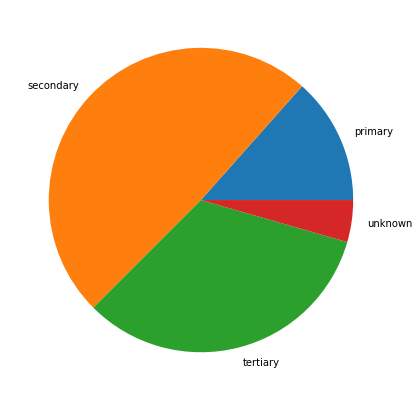

In [25]:
plt.figure(figsize = (7, 7))
plt.pie(count, labels = groupName)
plt.show()

Text(0.5, 1.0, 'Campaign Count Plot')

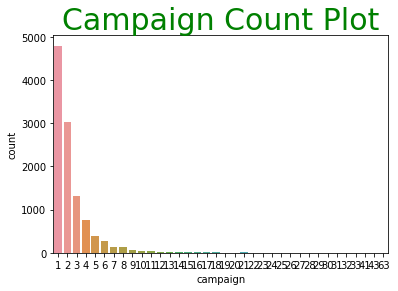

In [26]:
sns.countplot(df1.campaign)
plt.title("Campaign Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Count Plot')

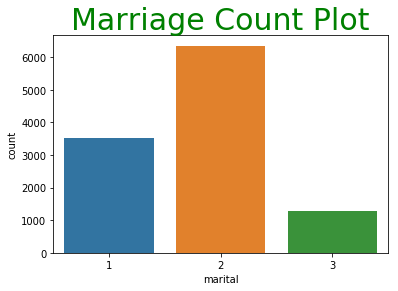

In [27]:
sns.countplot(df1.marital)
plt.title("Marriage Count Plot", color = 'green', fontsize = 30)

# Age and Month Plot

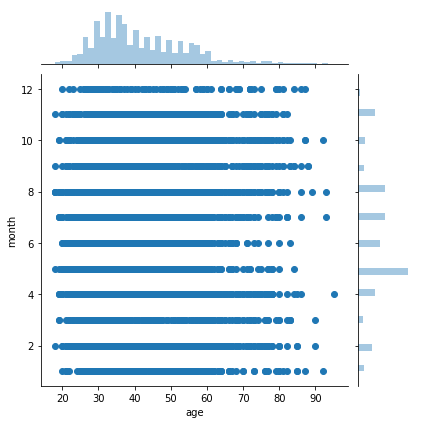

In [28]:
sns.jointplot(df1['age'],df1['month'])

Text(0.5, 1.0, 'Marriage Age Count Plot')

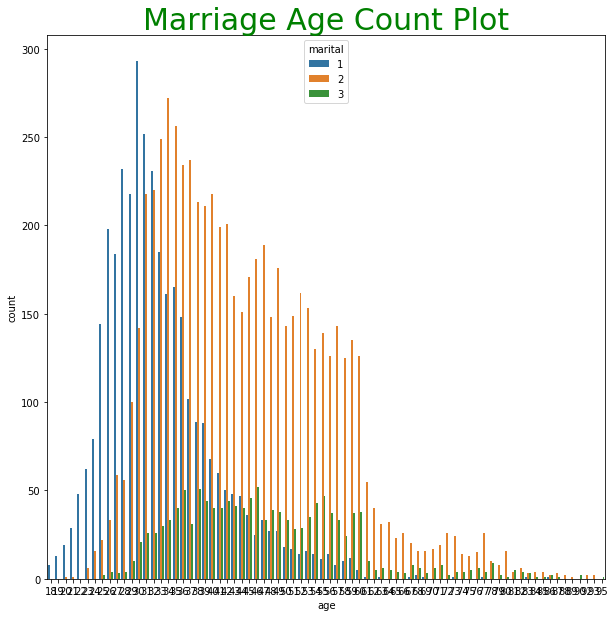

In [29]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['age'],hue=df1['marital'])
plt.title("Marriage Age Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Age Deposit Count Plot')

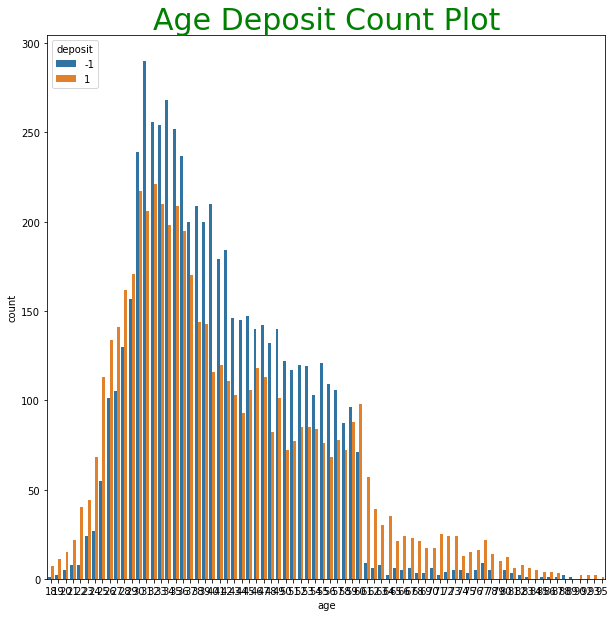

In [30]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['age'],hue=df1['deposit'])
plt.title("Age Deposit Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Deposit Count Plot')

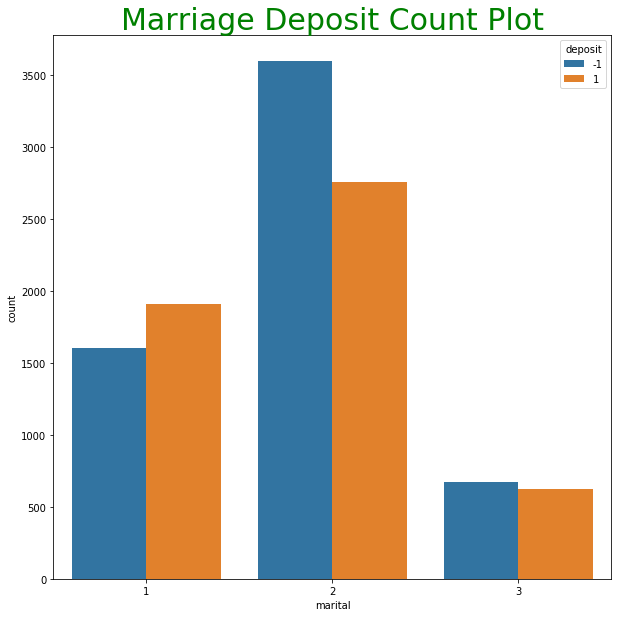

In [31]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['marital'],hue=df1['deposit'])
plt.title("Marriage Deposit Count Plot", color = 'green', fontsize = 30)

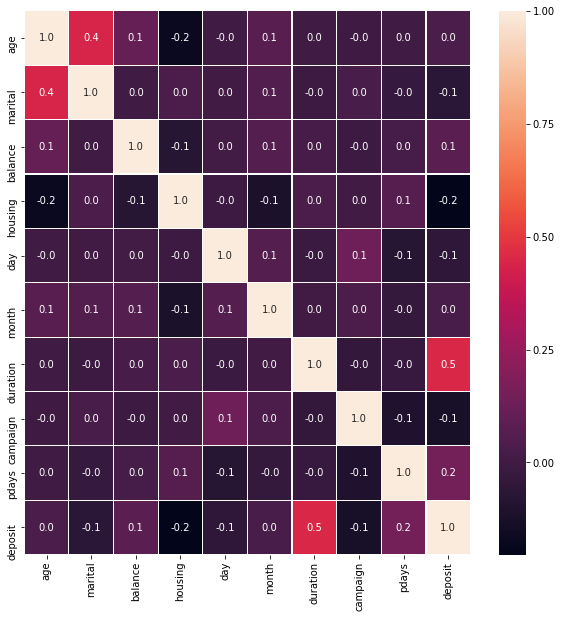

In [32]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# Preliminary Observations

Visualization of data has been performed above and the following are the observations that we can observe from the visualizations performed above.

1.There are a large number of people who have secondary education compared to the other people in this particular dataset. Around 50 % of the people have secondary education as we can see from the pie diagram above. 

2.We can see that a lot of different campaigns were used to do the marketing of the the schemes the bank had for the customers.However predominantly campaign 1 has been used extensively in this particualar dataset.

3.We can see that we have a mix of three types of people in terms of marital status. Among the large number of people that we have a large portion of them are married followed by single people and then divorced people.

4.We can see in the age month plot that most people who have been contacted by the bank are in the range of 25 to 45 and most of them have been contacted in the month of May

5.The marriage age plot shows us how the age of the people coupled along with their marital status. The following Age deposit plot shows us the age of the people coupled with their decision to deposit or not.

6.The Marriage deposit plot shows the marital status coupled along with the deposit and we can observe that married people are more likely to deposit in the bank followed by single and then the divorced people.

7.The heat map shows the degree of correlation that exists between the different feature vvariables present in the dataset as it can be observed in the above heatmap

# A. SUPERCLASS DEFINITION

In [33]:
import numpy as np
from abc import ABC, abstractmethod
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def __init__(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ standardize the input X """
        
        if not isinstance(X, np.ndarray):
            X = np.asanyarray(X)

        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)

        # TODO: Finish this normalization
        standardizedX = (X -self.meanX)/ self.stdX
        return standardizedX

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass 

# II. METHODS

# Summary of Classification models

# 1.Pocket Algorithm
It is a refinement of the perceptron algorithm. Perceptron too can be used for classification but pocket has some advantages over it. In the Pocket Algorithm it repeatedly executes the perceptron algorithm and maintains in the pocket the weight vector which is remained unchanged for the highest number of iterations.

# 2.QDA
is a type of Bayesian clssifier. In QDA there is no assumption that the covariance of each of the classes is identical. When the normality assumption is true, the best possible test for the hypothesis that a given measurement is from a given class is the likelihood ratio test.

# 3.LDA
Linear discriminant analysis (LDA) is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

# 4.Logistic Regression
is a method for analyzing a dataset in which there are one or more independent variables that determine the target. Though in this case, the target must be measured in a binary variable.

# A. POCKET ALGORITHM

# Preparing Data for Pocket Algorithm

In [34]:
import matplotlib as mt
from matplotlib import pyplot as plt

In [35]:
def normalize(X):
    return (X/X.max())

In [36]:
df1.day.max()
df1["day"] = normalize(df1["day"])

In [37]:
df1.day.max()

1.0

In [38]:
df1.month.max()

12

In [39]:
df1["month"] = normalize(df1["month"])

In [40]:
df1.month.max()

1.0

In [41]:
df1.duration.max()

3881

In [42]:
df1["duration"] = normalize(df1["duration"])

In [43]:
df1.duration.max()

1.0

In [44]:
df1.campaign.max()

63

In [45]:
df1["campaign"] = normalize(df1["campaign"])

In [46]:
df1.campaign.max()

1.0

In [57]:
X = df1[['day', 'month', 'duration','campaign']].copy()
T = df1[['deposit']].copy()

In [58]:
#Splitting Dataset into Training and Testing Data
data = df1.sample(10000)
training_data = data.iloc[:8000,:]
testing_data = data.iloc[8000:10000,:]

End of training:  99


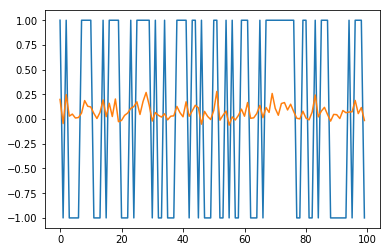

In [59]:
maxiter = 100
alpha = 0.1

X = training_data[["day","month","duration","campaign"]].values
X = X[:500]
N = X.shape[0]
T = training_data[["deposit"]].values
T = T[:500]

X_Test = testing_data[["day","month","duration","campaign"]].values

T_Test = testing_data[["deposit"]].values

#T[:50] *= -1 
X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))


w = np.zeros(5) 

plt.plot(T[:100])
for i in range(maxiter):
    
    converged = True
    for k in range(N):
        y = w @ X1[k]
        if np.sign(y) != np.sign(T[k]):
            w += alpha * T[k] * X1[k]
            converged = False
    
    if converged:
        print("converged at ", i)
        break

print("End of training: ", i)
Y = X1@w
plt.plot(Y[:100])

# B. Pocket Algorithm

# Pocket Class

In [69]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier): 
    
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.alpha = alpha
        self.w_pocket = None
       
 # train PocketAlgorithm model and store the best weights in w_pocket
    def train(self, X, T):
        
        def compare(X, T, w, wp):
            y = np.sign(X @ w)
            yp = np.sign(X @ wp)
            return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
        w = np.zeros(5)
        self.w_pocket = copy(w)
        maxiter = 1000
        plt.plot(T[:100])
        for i in range(maxiter):
    
            converged = True
            for k in np.random.permutation(N): #range(N):
                    y = w @ X1[k]
                    if np.sign(y) != np.sign(T[k]):
                        w += self.alpha * T[k] * X1[k]
                        converged = False
                        ##### additional for pocket algorithm 
                    if compare(X1, T, w, self.w_pocket) > 0: 
                        self.w_pocket[:] = w[:]
    
            if converged:
                print("converged at ", i)
                break

        print("End of training: ", i)

   # apply the learned model to data X
    def use(self, X):
        Y1 = X1@self.w_pocket
        plt.plot(Y1[:100])
        return Y1

End of training:  999


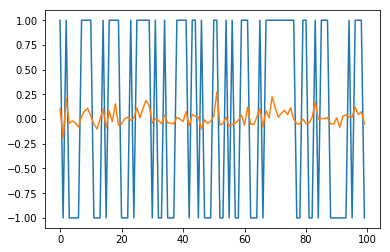

In [70]:
P = PocketAlgorithm(0.1)
P.train(X[:500],T[:500])
Y = P.use(X_Test[:500])

Confusion Matrix

In [71]:
def confusion_matrix(Y, T):
    """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
    """
    
    if len(Y) != len(T):
        raise ValueError("Wrong prediction and target length!")
    
    classes = np.unique(T)
    n_classes = len(classes)
    
    cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)
    
    Tidx = [T == c for c in classes]
    for c in classes:
        pred_idx = Y == c
        cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]
    
    return cfm

# Calulating Evation Metrics

In [72]:
T=T.flatten()

In [73]:
confusion_matrix(np.sign(Y),np.sign(T))

,-1,1
-1,215,59
1,65,161


In [74]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_curve
Y = np.where(Y > 0,1,-1)
print("Precision: {:.2f}%".format(100 * precision_score(T_Test[:500],Y)))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test[:500],Y)))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test[:500],Y)))

Precision: 53.98%
Recall: 48.41%
F1 score: 51.05%


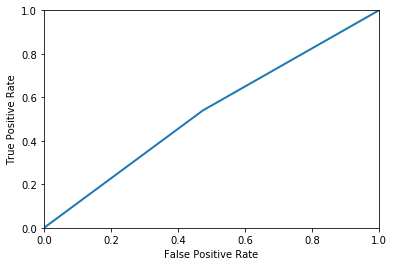

In [75]:
falsepos, truepos, thresholds = metrics.roc_curve(Y,T_Test[:500], pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

# C. QDA

# Preparing Data for QDA and LDA

In [77]:
df2 = df1[['day','month', 'duration','campaign','deposit']]

In [78]:
df2.head()

,day,month,duration,campaign,deposit
0,0.16129,0.416667,0.268488,0.015873,1
1,0.16129,0.416667,0.377995,0.015873,1
2,0.16129,0.416667,0.357897,0.015873,1
3,0.16129,0.416667,0.149188,0.015873,1
4,0.16129,0.416667,0.173409,0.031746,1


In [79]:
df2 = df2.sample(11000)

In [80]:
df2_train = df2[:8000]
df2_test = df2[8000:10916]

In [81]:
type(df2_test)

pandas.core.frame.DataFrame

In [82]:
df2_test.shape

(2916, 5)

In [83]:
df2_test.head()

,day,month,duration,campaign,deposit
10945,0.516129,0.583333,0.155888,0.095238,-1
2775,0.612903,0.833333,0.033754,0.015873,1
4362,0.612903,0.666667,0.074723,0.238095,1
2632,0.096774,0.750000,0.066993,0.015873,1
2992,0.225806,1.000000,0.239371,0.079365,1


In [84]:
T_Test = df2_test.drop(columns =['day','month','duration','campaign'])

In [86]:
T_Test.head()

,deposit
10945,-1
2775,1
4362,1
2632,1
2992,1


In [87]:
df2_test.head()

,day,month,duration,campaign,deposit
10945,0.516129,0.583333,0.155888,0.095238,-1
2775,0.612903,0.833333,0.033754,0.015873,1
4362,0.612903,0.666667,0.074723,0.238095,1
2632,0.096774,0.750000,0.066993,0.015873,1
2992,0.225806,1.000000,0.239371,0.079365,1


In [88]:
df2_test = df2_test.drop(columns =['deposit'])

In [89]:
df2_test.head()

,day,month,duration,campaign
10945,0.516129,0.583333,0.155888,0.095238
2775,0.612903,0.833333,0.033754,0.015873
4362,0.612903,0.666667,0.074723,0.238095
2632,0.096774,0.750000,0.066993,0.015873
2992,0.225806,1.000000,0.239371,0.079365


In [90]:
df2_test.shape

(2916, 4)

In [91]:
len(df2_train)

8000

In [92]:
c1=df2_train[df2_train['deposit']>0]
c2=df2_train[df2_train['deposit']<0]

In [93]:
len(c1)

3753

In [94]:
c1.head()

,day,month,duration,campaign,deposit
1617,0.741935,0.333333,0.041999,0.015873,1
3959,0.419355,0.750000,0.056171,0.047619,1
310,0.548387,0.500000,0.174182,0.031746,1
3592,0.258065,0.500000,0.055398,0.015873,1
1741,0.967742,0.333333,0.059263,0.015873,1


In [95]:
len(c2)

4247

In [96]:
c2.head()

,day,month,duration,campaign,deposit
6495,0.354839,0.666667,0.023190,0.047619,-1
8442,0.612903,0.416667,0.063901,0.047619,-1
9267,0.580645,0.916667,0.136563,0.015873,-1
5509,0.967742,0.083333,0.221335,0.015873,-1
6420,0.838710,0.416667,0.030405,0.015873,-1


In [97]:
c1.shape

(3753, 5)

In [98]:
c2.shape

(4247, 5)

In [99]:
C1 = c1[['day','month','duration','campaign']]
C1.head()

,day,month,duration,campaign
1617,0.741935,0.333333,0.041999,0.015873
3959,0.419355,0.750000,0.056171,0.047619
310,0.548387,0.500000,0.174182,0.031746
3592,0.258065,0.500000,0.055398,0.015873
1741,0.967742,0.333333,0.059263,0.015873


In [100]:
C1.shape

(3753, 4)

In [101]:
N1 = len(C1)
N1

3753

In [102]:
C2 = c2[['day','month','duration','campaign']]
C2.tail()

,day,month,duration,campaign
9114,0.677419,0.416667,0.064416,0.063492
6322,0.903226,0.416667,0.059005,0.031746
9981,0.516129,0.416667,0.072919,0.031746
5920,0.903226,0.416667,0.025509,0.031746
5848,0.580645,0.666667,0.052821,0.063492


In [103]:
C2.shape

(4247, 4)

In [104]:
N2 = len(C2)
N2

4247

In [105]:
X = np.vstack((C1, C2))
N=N1+N2

# QDA Class

In [106]:
from copy import deepcopy as copy 

class QDA_Algorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def normalize(self,X):
        means,stds = np.mean(X, 0),np.std(X, 0)
        Xs = (X - means) / stds
        return Xs

    def train(self,X,S,E):
        mu = np.mean(X[S:E], 0)
        Sigma = np.cov(X[S:E].T)
        return mu,Sigma

    def use(self,X, mu, sigma, prior):
        sigma_inv = np.linalg.inv(sigma)
        diffv = X - mu
        return -0.5  * np.log(np.linalg.det(sigma)) \
            - 0.5 * np.sum(diffv @ sigma_inv * diffv, axis=1) \
            + np.log(prior)

# Making an object of the class

In [107]:
q = QDA_Algorithm()

# Normalizing the Data

In [108]:
Xs = q.normalize(X)

# Training the Data

In [109]:
mu1,Sigma1 = q.train(Xs,0,N1)
mu2,Sigma2 = q.train(Xs,N1,N)

prior1 = N1 / N
prior2 = N2 / N

# Plotting the graph

In [112]:
xs, ys = np.meshgrid(np.linspace(-3,7,54), np.linspace(-3,7,54))
#df2_test = np.vstack((xs.flat, ys.flat)).T
XtestS = q.normalize(df2_test.values)
d1 = q.use(XtestS, mu1, Sigma1, prior1)
d2 = q.use(XtestS, mu2, Sigma2, prior2)

Text(0.5, 0, 'QDA P(x|Class=k)\n from disc funcs')

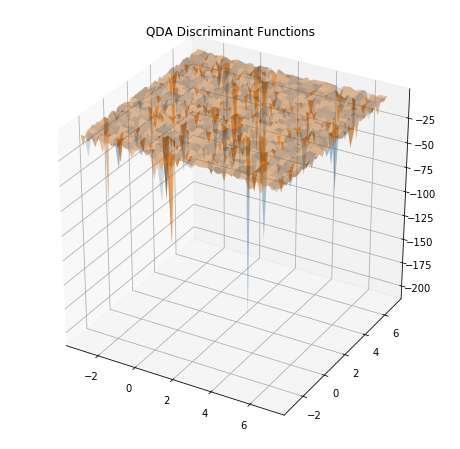

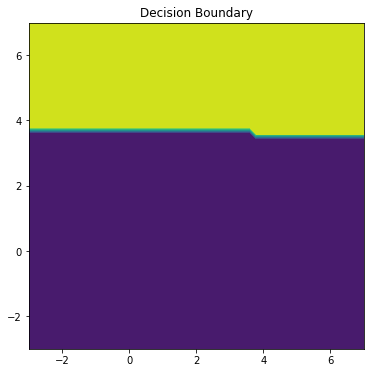

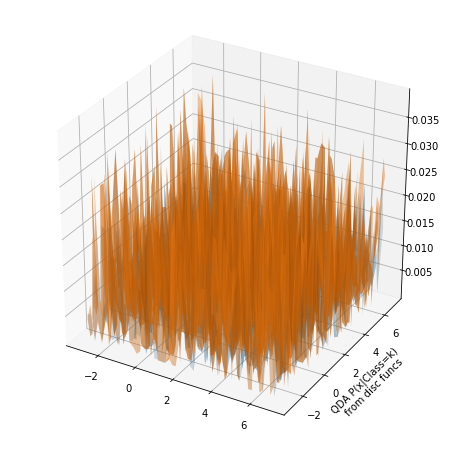

In [113]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("QDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")
#plt.plot(C1[:], 'or')
#plt.plot(C2[:],'xb')

# Plot generative distributions  p(x | Class=k)  starting with discriminant functions

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')

prob1 = np.exp( d1.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior1))
prob2 = np.exp( d2.reshape(xs.shape) - 0.5*X.shape[1]*np.log(2*np.pi) - np.log(prior2))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)


plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")

In [135]:
D = []
D.append(d1)
D.append(d2)
#print(len(D))
D = np.argmax(D,axis=0)
#print(D)
for i in range(len(D)):
    if D[i] == 0:
        D[i] = -1

# Calulating Evation Metrics

In [139]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,D,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,D,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,D,average='micro')))

Precision: 29.87%
Recall: 29.87%
F1 score: 29.87%


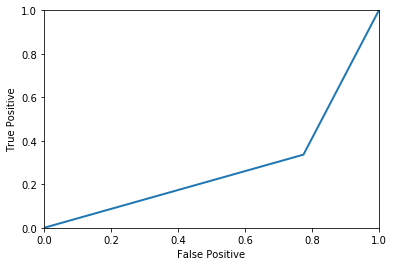

In [141]:
falsepos, truepos, thresholds = metrics.roc_curve(D,T_Test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [169]:
confusion_matrix(np.sign(D),np.sign(T_Test.values).flatten())

,-1,1
-1,223,767
1,1278,648


# D. LDA

In [147]:
Xtrain = np.vstack((C1, C2))
N=N1+N2

# LDA Class

In [148]:
from copy import deepcopy as copy 

class LDA_Algorithm(Classifier): 
    
    def __init__(self):
        Classifier.__init__(self)

    def normalize(self,X):
        means,stds = np.mean(X, 0),np.std(X, 0)
        Xs = (X - means) / stds
        return Xs

    def train(self,X,S,E):
        mu = np.mean(X[S:E], 0)
        return mu

    def use(self,X,mu,sigma,prior):
        sigma_inv = np.linalg.inv(sigma)
        return np.sum(np.dot(X, sigma_inv) * mu \
                - 0.5 * np.dot(mu, sigma_inv) * mu \
                + np.log(prior), axis=1)

# Making an object for LDA Class

In [149]:
l = LDA_Algorithm()

# Normalizing the Data

In [150]:
Xs = l.normalize(Xtrain)

# Training the Data

In [151]:
mu1 = l.train(Xs,0,N1)
mu2 = l.train(Xs,N1,N)

Sigma = np.cov(Xs.T)
prior1 = N1 / N
prior2 = N2 / N

In [152]:
## now compute the discriminant function on test data
xs, ys = np.meshgrid(np.linspace(-3,7, 54), np.linspace(-3,7, 54))
Xtest = np.vstack((xs.flat, ys.flat)).T
XtestS = l.normalize(df2_test.values)
d1 = l.use(XtestS, mu1, Sigma, prior1)
d2 = l.use(XtestS, mu2, Sigma, prior2)

# Plotting the graph

Text(0.5, 1.0, 'Decision Boundary')

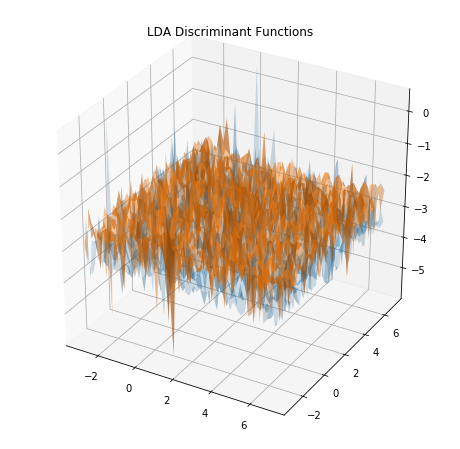

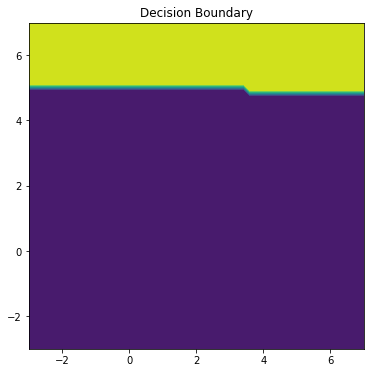

In [153]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, d1.reshape(xs.shape), alpha=0.2)
ax.plot_surface(xs, ys, d2.reshape(xs.shape), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys,np.sort((d1-d2 > 0),0).reshape(xs.shape))
plt.title("Decision Boundary")

# Calulating Evation Metrics

In [154]:
D2 = []
D2.append(d1)
D2.append(d2)
#print(len(D))
D2 = np.argmax(D2,axis=0)
#print(D)
for i in range(len(D2)):
    if D2[i] == 0:
        D2[i] = -1

In [155]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,D2,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,D2,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,D2,average='micro')))

Precision: 34.36%
Recall: 34.36%
F1 score: 34.36%


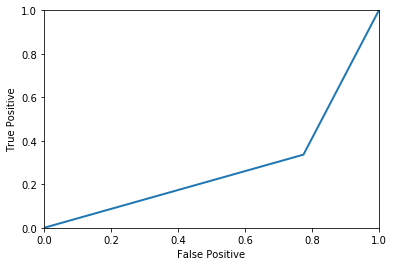

In [156]:
falsepos, truepos, thresholds = metrics.roc_curve(D,T_Test, pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [170]:
confusion_matrix(np.sign(D2),np.sign(T_Test.values).flatten())

,-1,1
-1,100,513
1,1401,902


# E. Logistic Regression

In [236]:
from copy import deepcopy as copy
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        
    """
    def __init__(self,alpha):
        Classifier.__init__(self)
        self.w = None
        self.alpha = alpha
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    
    def train(self, X, T):
        X = self.normalize(X)
       
        N = X.shape[0]
        D = X.shape[1]
        K = len(np.unique(T))
        
        self.w = np.random.rand(D+1, K)

        niter = 10
        X = self.add_ones(X)
        
        T = self.add_ones(T.reshape(-1,1))
        
        for step in range(niter):
                ys = self.g(X,self.w)
                self.w += self.alpha * X.T @ (T - ys)                
    
    # apply the learned model to data X
    def use(self, X):
        Xs = (X - self.meanX)/self.stdX
        Xs = self.add_ones(Xs)
        return self.g(Xs, self.w)

In [237]:
X = df1[['day', 'month', 'duration','campaign']].copy()
T = df1[['deposit']].copy()

In [238]:
data = df1.sample(10000)
training_data = data.iloc[:8000,:]
testing_data = data.iloc[8000:10000,:]

In [239]:
X_Train = training_data[["day","month","duration","campaign"]].values
#X_Train = X[:7000]
N = X.shape[0]
T_Train = training_data[["deposit"]].values
#T_Train = T[:7000]

In [240]:
X_Test = testing_data[["day","month","duration","campaign"]].values
T_Test = testing_data[["deposit"]].values

In [242]:
lr = LogisticRegression(0.000999)
lr.train(X_Train[:5000],T_Train[:5000])
Y = lr.use(X_Test[:2000])

Accuracy:  51.754 %


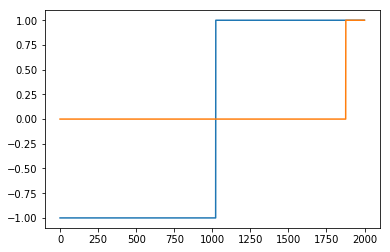

In [243]:
Yl = np.argmax(Y, 1)
Tl=np.where(T_Test==-1,0,1)

plt.plot(np.sort(T_Test,0))
plt.plot(np.sort(Yl,0))

print("Accuracy: ", 100 - np.mean(np.abs(Tl[:100] - Yl)) * 100, "%")

# Calulating Evation Metrics

In [249]:
from sklearn.metrics import precision_score, recall_score,f1_score,roc_auc_score
print("Precision: {:.2f}%".format(100 * precision_score(T_Test,Yl,average='micro')))
print("Recall: {:.2f}%".format(100 * recall_score(T_Test,Yl,average='micro')))
print("F1 score: {:.2f}%".format(100 * f1_score(T_Test,Yl,average='micro')))

Precision: 56.60%
Recall: 56.60%
F1 score: 56.60%


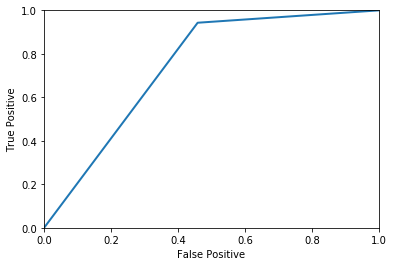

In [246]:
falsepos, truepos, thresholds = metrics.roc_curve(Yl,T_Test[:2000], pos_label=None)
plt.plot(falsepos, truepos,linewidth=2, label= None)
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [247]:
for i in range(len(Yl)):
    if Yl[i] == 0:
        Yl[i] = -1

In [248]:
confusion_matrix(np.sign(Yl),np.sign(T_Test).flatten())

,-1,1
-1,1016,861
1,7,116


# EXPLANATION OF CODES

# 1.Pocket Algorithm 

The Pocket algorithm consists of the apha which is the learning rate and the pocket.
The Pocket algorithm has two methods Train and Use explained as follows

a.Train:The training method is used to calculate the weights.In this method we are iterating over the input samples and updating the weight using the weight formula after which the weight matrix s calculated. At each iteration we use the compare method to check if the calculated weight is better than the previous weight. If it is then its stored in w_pocket and eventually the best weight is stored in w_pocket.

b.Use:First the train method is run after which the use method is run. In this method we take the dot product of the input data and the w_pocket.

# 2.QDA 

This class inherits the classifier base class overiding the normalize method and inheriting the train and use method which are explained as follows

a.Normalize:This method takes the input and calculates its respective mean and standard deviation which are then used to normalize the input by subtracting the input from mean and dividing it by the standard deviation.

b.Train:This method takes the input and calculates the mu by calculating its mean and Sigma by calcualting its covariance and then returns mu and sigma. 

c.Use:This method calculates the inverse of Sigma and calculates the difference between the sample and the mean which is mu and then the result has been calculated as we can see in the code.

# 3.LDA 

This class inherits the classifier base class overiding the normalize method and inheriting the train and use method which are explained as follows

a.Normalize:This method takes the input and calculates its respective mean and standard deviation which are then used to normalize the input by subtracting the input from mean and dividing it by the standard deviation.

b.Train:This method takes the input and calculates the mu by calculating its mean and then returns mu. 

c.Use:This method calculates the inverse of Sigma and then the result has been calculated as we can see in the code.


# 4.Logistic Regression 

This class inherits the classifier base class inheriting the train and use method which have been explained. This class also has softmax and g method as helper methods.

a.Train:This method updates the weights iteratively after calculating the derivative of the softmax transformation.For calculating the softmax function, it uses the function softmax and uses the function g for calculating the dot product of the weight matrix and input matrix.

b.Use:This method calculates the dot product of the input samples and the weight matrix to give the output.his output is provided by using the g function which is calculating the dot product of the current weight matrix and input matrix.

# IV. Experiments

# DISCUSSION ABOUT EVALUATION METRICES

The evaluation metrics have been calculated after the implementation of each class of each of the four classififcation algorithms.

ROC Curve is plotted for all the algorithms. ROC curve also shows that performance is logistic regression is better than others.(As the Precision and Accuracy is the largest so the ROC Curve of Logistic Regression is the best is my assumption.)

To evaluate the results, I have calculated the precesion, recall, F1 score for each of the above algorithms.The calculation of these metrics is done using sklearn.metrics library. Based on the above results,the accuracy and precision of Logistic regression seems to be highest.

# DISCUSSION ABOUT TRAIN AND TEST ACCURACIES

The confusion matrix has been calculated for each of the above alorithms. The classification of logistic regression seems to be the best among the four algorithms which can be cross verified with the evaluation metrics calculated above. The algorithms take a long time to run for large input. Thats why very large input has not been used in the above algorithms. The performance of these algorithms also depends on the processor on which it is running.

# PLOTS FOR RESULTS

For each of the four algorithms the results have been plotted above after the classes of the four classification algorithms.

# DISCUSSIONS FOR CLASSIFICATION MODEL COMPARISON

The following are the Precision of each of the four algorithms as follows:

1.Pocket   : 53.98 %

2.QDA      : 29.87 %

3.LDA      : 34.36 %

4.Logistic Regression : 56.60 %




From the above results we can say that for this particular dataset Logistic Regression is performing the best classification among the four algorithms that have been implemented above.

As Pocket is a perctron learning techinque it takes a lot of time to compute the result compared to QDA,LDA and Logistic Regression. I feel that Pocket is basic procedure compared to the other three classififation algorithms.

QDA assusmes a quadratic decision boundary so it can be used to adress a wider range of problems compared to any linear model.

# Conclusions

Learnings:

I was able to learn and implement the different claasification algorithms without using any inbuilt libraries which are present and can be used.

I was able to understand how various mathematical concepts are implemented using different classification algorithms such as Pocket,QDA,LDA and Logistic Regression.


Challenges:

The pocket algorithm being an interative and slow process took a lot of time to complete implementation. A lot of time was spent to get a proper result as the pocket algorithm took a lot of time to be implemented on large inputs.

The mathematics behind QDA, LDA and Logistic Regression was difficult to understand which took a lot of time due to which the implementation also took quiet a while to be implementated.

# References

Kaggle Bank Marketing Dataset. Retrieved from https://www.kaggle.com/janiobachmann/bank-marketing-dataset

Logistic Regression. Retrieved from http://www.statisticssolutions.com/what-is-logistic-regression/

Matplotlib. Retrieved from https://matplotlib.org/

Seaborn. Retrieved from https://seaborn.pydata.org/

Wikipedia. Retrived from https://www.wikipedia.org/

Stackoverflow. Retrived from https://stackoverflow.com/

And More